<a href="https://colab.research.google.com/github/a-nagar/cs4372/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_california_housing
import xgboost as xgb
import multiprocessing

In [ ]:
X, y = fetch_california_housing(return_X_y=True)
xgb_model = xgb.XGBRegressor(n_jobs=multiprocessing.cpu_count() // 2)
clf = GridSearchCV(xgb_model, {'max_depth': [2, 4, 6],
                                   'n_estimators': [50, 100, 200]}, verbose=1,
                       n_jobs=2)
clf.fit(X, y)
print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[21:41:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.6787611427195603
{'max_depth': 6, 'n_estimators': 100}


In [ ]:
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/pima-indians-diabetes.csv", header=None, names=col_names)
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [ ]:
xgb_model = xgb.XGBClassifier(n_jobs=multiprocessing.cpu_count() // 2)
clf = GridSearchCV(xgb_model, {'max_depth': [2, 4, 6],
                                   'n_estimators': [50, 100, 200, 500]}, verbose=1,
                       n_jobs=2)
clf.fit(X, y)
print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.7773703420762244
{'max_depth': 2, 'n_estimators': 200}


# Application to the Cuisines Dataset

In [ ]:
import pandas as pd
cuisines_df = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/cuisines.csv")
cuisines_df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
cuisines_label_df = cuisines_df['cuisine']
cuisines_label_df.head()

0    indian
1    indian
2    indian
3    indian
4    indian
Name: cuisine, dtype: object

In [ ]:
cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)
cuisines_feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
xgb_model = xgb.XGBClassifier(n_jobs=multiprocessing.cpu_count() // 2)
clf = GridSearchCV(xgb_model, {'max_depth': [10, 12],
                                   'n_estimators': [100, 200]}, verbose=1,
                       n_jobs=2)
clf.fit(cuisines_feature_df, cuisines_label_df)
print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.8177722152690864
{'max_depth': 12, 'n_estimators': 200}


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(cuisines_feature_df)
y_probs = clf.predict_proba(cuisines_feature_df)
accuracy = accuracy_score(cuisines_label_df, y_pred)
print(classification_report(cuisines_label_df,y_pred))

              precision    recall  f1-score   support

     chinese       0.97      0.89      0.93       799
      indian       0.98      0.98      0.98       799
    japanese       0.95      0.94      0.95       799
      korean       0.99      0.97      0.98       799
        thai       0.88      0.98      0.93       799

    accuracy                           0.95      3995
   macro avg       0.95      0.95      0.95      3995
weighted avg       0.95      0.95      0.95      3995



In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


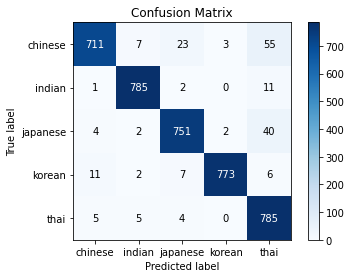

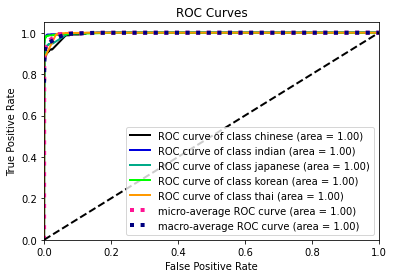

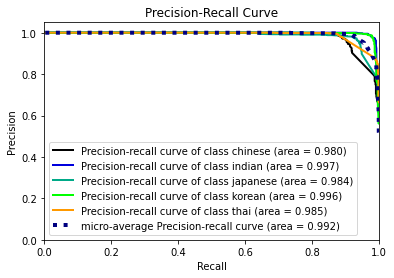

In [ ]:
skplt.metrics.plot_confusion_matrix(cuisines_label_df, y_pred)
skplt.metrics.plot_roc(cuisines_label_df, y_probs)
skplt.metrics.plot_precision_recall_curve(cuisines_label_df, y_probs)
plt.show()